In [18]:
import numpy as np

In [19]:
# 코드 사전 정의
code2idx = {'c4': 0, 'd4': 1, 'e4': 2, 'f4': 3, 'g4': 4, 'a4': 5, 'b4': 6,
            'c8': 7, 'd8': 8, 'e8': 9, 'f8': 10, 'g8': 11, 'a8': 12, 'b8': 13}

idx2code = {0: 'c4', 1: 'd4', 2: 'e4', 3: 'f4', 4: 'g4', 5: 'a4', 6: 'b4',
            7: 'c8', 8: 'd8', 9: 'e8', 10: 'f8', 11: 'g8', 12: 'a8', 13: 'b8'}

In [20]:
# 시퀀스 데이터 정의
# 악보
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [21]:
# 데이터셋 생성 함수 (코드를 인덱스로 변환)
def seq2dataset(seq, window_size):
    dataset = []
    
    # 시퀀스 열을 받아서 window_size 크기로 분리(데이터를 특성, 라벨로 분리)
    for i in range(len(seq)-window_size):
        subset = seq[i : (i + window_size +1)]
        dataset.append([code2idx[item] for item in subset])
        
    return np.array(dataset)
        

In [23]:
# 데이터 셋 생성하기 (4개 특성(X), 1개 라벨(예측값, y))
dataset = seq2dataset(seq, window_size=4)

print(dataset.shape)
print('\n')
print(dataset)

(50, 5)


[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [25]:
# 입력(X)과 출력(y) 변수로 분리!
X_train = dataset[ : , :4]
y_train =dataset[ : ,4]

In [26]:
import pandas as pd

In [30]:
# 음표의 종류 (0~13)
max_idx_value = 13  

In [32]:
# 입력값 정규화 시키기 (0-1 범위로 변경)
X_train = X_train / float(max_idx_value)

In [34]:
# 라벨값 원핫인코딩 시키기! (확률)
y_train = pd.get_dummies(y_train)

###  모델링

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
y_train.shape[1]

9

In [48]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation = 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax')) # 출력층


In [52]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 4ms/step - loss: 2.1791 - accuracy: 0.1600
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.1399 - accuracy: 0.2200
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1053 - accuracy: 0.2800
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0738 - accuracy: 0.3400
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.0426 - accuracy: 0.3400
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0126 - accuracy: 0.3400
Epoch 7/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9823 - accuracy: 0.3400
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9581 - accuracy: 0.3400
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9405 - accuracy: 0.3400
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9130 - accuracy: 0.3400
Epoch 11/1000
2/2 [

2/2 [==============================] - 0s 3ms/step - loss: 1.4873 - accuracy: 0.4800
Epoch 84/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.4839 - accuracy: 0.4800
Epoch 85/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.4794 - accuracy: 0.4800
Epoch 86/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.4756 - accuracy: 0.5200
Epoch 87/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.4765 - accuracy: 0.5400
Epoch 88/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.4737 - accuracy: 0.5400
Epoch 89/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.4699 - accuracy: 0.5400
Epoch 90/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.4666 - accuracy: 0.5400
Epoch 91/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.4646 - accuracy: 0.5600
Epoch 92/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.4610 - accuracy: 0.5400
Epoch 93/1000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 1.2858 - accuracy: 0.5600
Epoch 166/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.2843 - accuracy: 0.5600
Epoch 167/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2802 - accuracy: 0.5600
Epoch 168/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.2816 - accuracy: 0.5600
Epoch 169/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2763 - accuracy: 0.5600
Epoch 170/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.2725 - accuracy: 0.5600
Epoch 171/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.2696 - accuracy: 0.5600
Epoch 172/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2683 - accuracy: 0.5600
Epoch 173/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2650 - accuracy: 0.5600
Epoch 174/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2654 - accuracy: 0.5400
Epoch 175/1000


2/2 [==============================] - 0s 3ms/step - loss: 1.1067 - accuracy: 0.6000
Epoch 248/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1041 - accuracy: 0.6000
Epoch 249/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.1000 - accuracy: 0.6000
Epoch 250/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.5800
Epoch 251/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.5400
Epoch 252/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.5400
Epoch 253/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.5400
Epoch 254/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.5400
Epoch 255/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0918 - accuracy: 0.5400
Epoch 256/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.0868 - accuracy: 0.5400
Epoch 257/1000


2/2 [==============================] - 0s 3ms/step - loss: 0.9499 - accuracy: 0.6200
Epoch 330/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9494 - accuracy: 0.5800
Epoch 331/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9485 - accuracy: 0.5800
Epoch 332/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9463 - accuracy: 0.5800
Epoch 333/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.9431 - accuracy: 0.5800
Epoch 334/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.9418 - accuracy: 0.5800
Epoch 335/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.9401 - accuracy: 0.5800
Epoch 336/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.9403 - accuracy: 0.6200
Epoch 337/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9395 - accuracy: 0.6200
Epoch 338/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.9368 - accuracy: 0.6000
Epoch 339/1000


2/2 [==============================] - 0s 4ms/step - loss: 0.8251 - accuracy: 0.7200
Epoch 412/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.7200
Epoch 413/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8179 - accuracy: 0.7000
Epoch 414/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8173 - accuracy: 0.7000
Epoch 415/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.6800
Epoch 416/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.6800
Epoch 417/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8208 - accuracy: 0.6800
Epoch 418/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8132 - accuracy: 0.7000
Epoch 419/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8088 - accuracy: 0.7000
Epoch 420/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8073 - accuracy: 0.7000
Epoch 421/1000


2/2 [==============================] - 0s 4ms/step - loss: 0.7180 - accuracy: 0.7200
Epoch 494/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7118 - accuracy: 0.7600
Epoch 495/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.7200
Epoch 496/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.7200
Epoch 497/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.7200
Epoch 498/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.7200
Epoch 499/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.7200
Epoch 500/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.7400
Epoch 501/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7055 - accuracy: 0.7600
Epoch 502/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.7600
Epoch 503/1000


2/2 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.7800
Epoch 576/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.6242 - accuracy: 0.7800
Epoch 577/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.7800
Epoch 578/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.7400
Epoch 579/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7600
Epoch 580/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.7600
Epoch 581/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.7800
Epoch 582/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.7800
Epoch 583/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.7800
Epoch 584/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7800
Epoch 585/1000


2/2 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.8000
Epoch 658/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7800
Epoch 659/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5535 - accuracy: 0.8000
Epoch 660/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.8200
Epoch 661/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.8200
Epoch 662/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7800
Epoch 663/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.5456 - accuracy: 0.7800
Epoch 664/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7800
Epoch 665/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7800
Epoch 666/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.8000
Epoch 667/1000


2/2 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.8400
Epoch 740/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.8200
Epoch 741/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.8000
Epoch 742/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.8200
Epoch 743/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4923 - accuracy: 0.8400
Epoch 744/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.8400
Epoch 745/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.8000
Epoch 746/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.8000
Epoch 747/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.8000
Epoch 748/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8000
Epoch 749/1000


2/2 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.8200
Epoch 822/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.8200
Epoch 823/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.8400
Epoch 824/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8600
Epoch 825/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.8600
Epoch 826/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4439 - accuracy: 0.8600
Epoch 827/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.8200
Epoch 828/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8200
Epoch 829/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.8400
Epoch 830/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8600
Epoch 831/1000


2/2 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8400
Epoch 904/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8600
Epoch 905/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.9000
Epoch 906/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.9000
Epoch 907/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.9000
Epoch 908/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8800
Epoch 909/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8600
Epoch 910/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8600
Epoch 911/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4016 - accuracy: 0.8600
Epoch 912/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8600
Epoch 913/1000


2/2 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.9000
Epoch 986/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.8600
Epoch 987/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.8800
Epoch 988/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8800
Epoch 989/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.9000
Epoch 990/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.9000
Epoch 991/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.9000
Epoch 992/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.9000
Epoch 993/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.9000
Epoch 994/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8800
Epoch 995/1000


In [54]:
import matplotlib.pyplot as plt

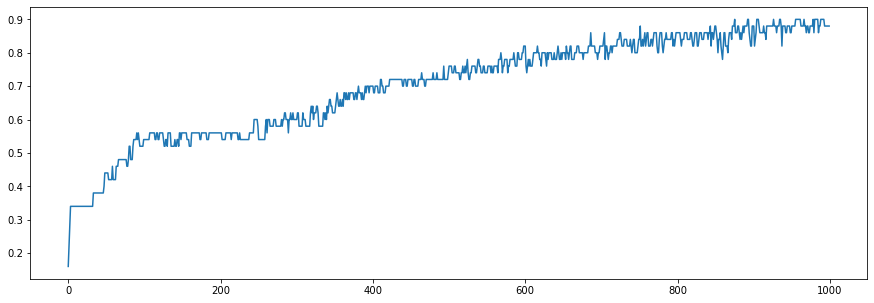

In [55]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.show()

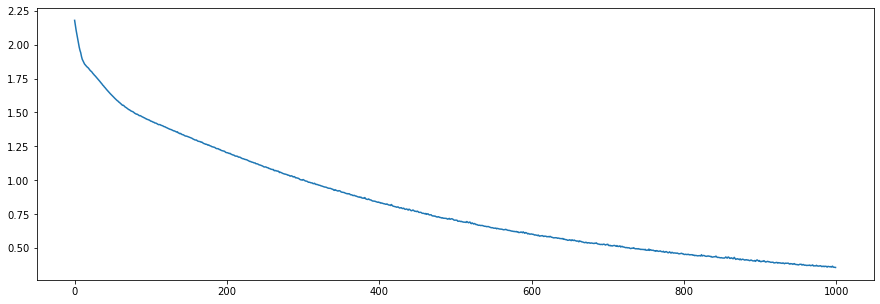

In [56]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.show()

In [57]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8800


[0.35385170578956604, 0.8799999952316284]

In [64]:
# 모델 사용하기
pred_count = 50 #최대 예측 개수 정의

# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(X_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])
    
print(seq_out)

2/2 [==============================] - 0s 2ms/step
['g8', 'e8', 'e4', 'f8', 'a4', 'c4', 'g4', 'b4', 'b4', 'c8', 'd8', 'd8', 'f4', 'd8', 'b4', 'd4', 'b4', 'c8', 'f4', 'c4', 'g4', 'b4', 'd8', 'd8', 'b4', 'b4', 'd4', 'a4', 'a4', 'a4', 'a4', 'b4', 'b4', 'e4', 'b4', 'b4', 'b4', 'b4', 'b4', 'b4', 'f4', 'd8', 'b4', 'c4', 'c8', 'a4', 'c4', 'g4', 'b4', 'd8', 'd8', 'b4', 'b4', 'd4']


In [70]:
# 곡 전체 예측


seq_in =['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it]/float(max_idx_value)for it in seq_in]

for i in range (pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in,(1,4))
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx/float(max_idx_value))
    seq_in.pop(0)
    
print(seq_out)

1/1 [==============================] - 0s 13ms/step
['g8', 'e8', 'e4', 'f8', 'a4', 'c4', 'g4', 'b4', 'd8', 'd8', 'b4', 'b4', 'b4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4']


## LSTM 추가해보기

In [76]:
X_train.shape
# run, lstm ->데이터 크기 맞추기 중요!!(샘플, 타임스텝)

(50, 4)

In [77]:
X_train = np.reshape(X_train, (50,4,1)) #샘플, 타임스텝

In [78]:
X_train.shape

(50, 4, 1)

In [79]:
from tensorflow.keras.layers import LSTM

In [96]:
model2 = Sequential()
model2.add(LSTM(128, batch_input_shape=(1,4,1), stateful=True))
model2.add(Dense(9, activation='softmax'))

In [97]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [98]:
num_epochs = 1000

for epoch_idx in range(num_epochs):
    print('epochs :' + str(epoch_idx))
    
    model2.fit(X_train, y_train, epochs=1, batch_size=1,shuffle=False )
    model2.reset_states()

epochs :0
50/50 [==============================] - 1s 3ms/step - loss: 2.1296 - accuracy: 0.2600
epochs :1
50/50 [==============================] - 0s 3ms/step - loss: 1.9714 - accuracy: 0.3400
epochs :2
50/50 [==============================] - 0s 3ms/step - loss: 1.9353 - accuracy: 0.3400
epochs :3
50/50 [==============================] - 0s 3ms/step - loss: 1.9237 - accuracy: 0.3400
epochs :4
50/50 [==============================] - 0s 4ms/step - loss: 1.9172 - accuracy: 0.3400
epochs :5
50/50 [==============================] - 0s 3ms/step - loss: 1.9127 - accuracy: 0.3400
epochs :6
50/50 [==============================] - 0s 3ms/step - loss: 1.9091 - accuracy: 0.3400
epochs :7
50/50 [==============================] - 0s 3ms/step - loss: 1.9061 - accuracy: 0.3400
epochs :8
50/50 [==============================] - 0s 3ms/step - loss: 1.9034 - accuracy: 0.3400
epochs :9
50/50 [==============================] - 0s 3ms/step - loss: 1.9008 - accuracy: 0.3400
epochs :10
50/50 [============

50/50 [==============================] - 0s 3ms/step - loss: 1.2213 - accuracy: 0.5200
epochs :84
50/50 [==============================] - 0s 3ms/step - loss: 1.3616 - accuracy: 0.5600
epochs :85
50/50 [==============================] - 0s 3ms/step - loss: 1.1768 - accuracy: 0.5600
epochs :86
50/50 [==============================] - 0s 3ms/step - loss: 1.0776 - accuracy: 0.5600
epochs :87
50/50 [==============================] - 0s 3ms/step - loss: 1.0588 - accuracy: 0.5800
epochs :88
50/50 [==============================] - 0s 3ms/step - loss: 1.3763 - accuracy: 0.5000
epochs :89
50/50 [==============================] - 0s 3ms/step - loss: 1.1716 - accuracy: 0.5800
epochs :90
50/50 [==============================] - 0s 3ms/step - loss: 1.2130 - accuracy: 0.5000
epochs :91
50/50 [==============================] - 0s 3ms/step - loss: 1.3447 - accuracy: 0.5200
epochs :92
50/50 [==============================] - 0s 3ms/step - loss: 1.2417 - accuracy: 0.4600
epochs :93
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 1.0000
epochs :167
50/50 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000
epochs :168
50/50 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 1.0000
epochs :169
50/50 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 1.0000
epochs :170
50/50 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 1.0000
epochs :171
50/50 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9400
epochs :172
50/50 [==============================] - 0s 4ms/step - loss: 1.7334 - accuracy: 0.4400
epochs :173
50/50 [==============================] - 0s 3ms/step - loss: 1.6930 - accuracy: 0.2600
epochs :174
50/50 [==============================] - 0s 3ms/step - loss: 1.2707 - accuracy: 0.4800
epochs :175
50/50 [==============================] - 0s 3ms/step - loss: 0.9743 - accuracy: 0.6000
epochs :176
50/50 [===

50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
epochs :249
50/50 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
epochs :250
50/50 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
epochs :251
50/50 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
epochs :252
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
epochs :253
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
epochs :254
50/50 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
epochs :255
50/50 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
epochs :256
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
epochs :257
50/50 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
epochs :258
50/50 [===

50/50 [==============================] - 0s 3ms/step - loss: 2.9660e-04 - accuracy: 1.0000
epochs :330
50/50 [==============================] - 0s 3ms/step - loss: 2.8819e-04 - accuracy: 1.0000
epochs :331
50/50 [==============================] - 0s 3ms/step - loss: 2.8000e-04 - accuracy: 1.0000
epochs :332
50/50 [==============================] - 0s 3ms/step - loss: 2.7201e-04 - accuracy: 1.0000
epochs :333
50/50 [==============================] - 0s 3ms/step - loss: 2.6425e-04 - accuracy: 1.0000
epochs :334
50/50 [==============================] - 0s 3ms/step - loss: 2.5671e-04 - accuracy: 1.0000
epochs :335
50/50 [==============================] - 0s 3ms/step - loss: 2.4937e-04 - accuracy: 1.0000
epochs :336
50/50 [==============================] - 0s 3ms/step - loss: 2.4226e-04 - accuracy: 1.0000
epochs :337
50/50 [==============================] - 0s 3ms/step - loss: 2.3535e-04 - accuracy: 1.0000
epochs :338
50/50 [==============================] - 0s 3ms/step - loss: 2.2866e-04 -

50/50 [==============================] - 0s 3ms/step - loss: 3.1914e-05 - accuracy: 1.0000
epochs :409
50/50 [==============================] - 0s 3ms/step - loss: 3.0948e-05 - accuracy: 1.0000
epochs :410
50/50 [==============================] - 0s 3ms/step - loss: 3.0386e-05 - accuracy: 1.0000
epochs :411
50/50 [==============================] - 0s 3ms/step - loss: 2.9234e-05 - accuracy: 1.0000
epochs :412
50/50 [==============================] - 0s 3ms/step - loss: 2.9201e-05 - accuracy: 1.0000
epochs :413
50/50 [==============================] - 0s 3ms/step - loss: 2.7401e-05 - accuracy: 1.0000
epochs :414
50/50 [==============================] - 0s 3ms/step - loss: 2.9627e-05 - accuracy: 1.0000
epochs :415
50/50 [==============================] - 0s 3ms/step - loss: 2.7851e-05 - accuracy: 1.0000
epochs :416
50/50 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9600
epochs :417
50/50 [==============================] - 0s 3ms/step - loss: 2.4505 - accurac

50/50 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000
epochs :491
50/50 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
epochs :492
50/50 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
epochs :493
50/50 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
epochs :494
50/50 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
epochs :495
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
epochs :496
50/50 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
epochs :497
50/50 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
epochs :498
50/50 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
epochs :499
50/50 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
epochs :500
50/50 [===

50/50 [==============================] - 0s 3ms/step - loss: 2.5311e-04 - accuracy: 1.0000
epochs :572
50/50 [==============================] - 0s 3ms/step - loss: 2.4550e-04 - accuracy: 1.0000
epochs :573
50/50 [==============================] - 0s 4ms/step - loss: 2.3819e-04 - accuracy: 1.0000
epochs :574
50/50 [==============================] - 0s 3ms/step - loss: 2.3114e-04 - accuracy: 1.0000
epochs :575
50/50 [==============================] - 0s 3ms/step - loss: 2.2437e-04 - accuracy: 1.0000
epochs :576
50/50 [==============================] - 0s 3ms/step - loss: 2.1787e-04 - accuracy: 1.0000
epochs :577
50/50 [==============================] - 0s 3ms/step - loss: 2.1165e-04 - accuracy: 1.0000
epochs :578
50/50 [==============================] - 0s 3ms/step - loss: 2.0567e-04 - accuracy: 1.0000
epochs :579
50/50 [==============================] - 0s 3ms/step - loss: 1.9994e-04 - accuracy: 1.0000
epochs :580
50/50 [==============================] - 0s 3ms/step - loss: 1.9441e-04 -

50/50 [==============================] - 0s 3ms/step - loss: 3.3492e-05 - accuracy: 1.0000
epochs :651
50/50 [==============================] - 0s 3ms/step - loss: 3.2686e-05 - accuracy: 1.0000
epochs :652
50/50 [==============================] - 0s 3ms/step - loss: 3.1876e-05 - accuracy: 1.0000
epochs :653
50/50 [==============================] - 0s 3ms/step - loss: 3.1091e-05 - accuracy: 1.0000
epochs :654
50/50 [==============================] - 0s 3ms/step - loss: 3.0338e-05 - accuracy: 1.0000
epochs :655
50/50 [==============================] - 0s 3ms/step - loss: 2.9580e-05 - accuracy: 1.0000
epochs :656
50/50 [==============================] - 0s 3ms/step - loss: 2.8850e-05 - accuracy: 1.0000
epochs :657
50/50 [==============================] - 0s 3ms/step - loss: 2.8149e-05 - accuracy: 1.0000
epochs :658
50/50 [==============================] - 0s 3ms/step - loss: 2.7451e-05 - accuracy: 1.0000
epochs :659
50/50 [==============================] - 0s 3ms/step - loss: 2.6776e-05 -

50/50 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.7400
epochs :731
50/50 [==============================] - 0s 3ms/step - loss: 0.8339 - accuracy: 0.7000
epochs :732
50/50 [==============================] - 0s 4ms/step - loss: 1.2873 - accuracy: 0.6600
epochs :733
50/50 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.6200
epochs :734
50/50 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.7200
epochs :735
50/50 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.6400
epochs :736
50/50 [==============================] - 0s 3ms/step - loss: 1.0248 - accuracy: 0.6800
epochs :737
50/50 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7600
epochs :738
50/50 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.8400
epochs :739
50/50 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.8200
epochs :740
50/50 [===

50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
epochs :813
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
epochs :814
50/50 [==============================] - 0s 3ms/step - loss: 9.6732e-04 - accuracy: 1.0000
epochs :815
50/50 [==============================] - 0s 3ms/step - loss: 9.3156e-04 - accuracy: 1.0000
epochs :816
50/50 [==============================] - 0s 3ms/step - loss: 8.9749e-04 - accuracy: 1.0000
epochs :817
50/50 [==============================] - 0s 3ms/step - loss: 8.6507e-04 - accuracy: 1.0000
epochs :818
50/50 [==============================] - 0s 3ms/step - loss: 8.3415e-04 - accuracy: 1.0000
epochs :819
50/50 [==============================] - 0s 3ms/step - loss: 8.0467e-04 - accuracy: 1.0000
epochs :820
50/50 [==============================] - 0s 3ms/step - loss: 7.7657e-04 - accuracy: 1.0000
epochs :821
50/50 [==============================] - 0s 3ms/step - loss: 7.4981e-04 - accurac

50/50 [==============================] - 0s 3ms/step - loss: 1.0053e-04 - accuracy: 1.0000
epochs :892
50/50 [==============================] - 0s 3ms/step - loss: 9.7948e-05 - accuracy: 1.0000
epochs :893
50/50 [==============================] - 0s 3ms/step - loss: 9.5390e-05 - accuracy: 1.0000
epochs :894
50/50 [==============================] - 0s 3ms/step - loss: 9.2904e-05 - accuracy: 1.0000
epochs :895
50/50 [==============================] - 0s 3ms/step - loss: 9.0475e-05 - accuracy: 1.0000
epochs :896
50/50 [==============================] - 0s 3ms/step - loss: 8.8146e-05 - accuracy: 1.0000
epochs :897
50/50 [==============================] - 0s 3ms/step - loss: 8.5910e-05 - accuracy: 1.0000
epochs :898
50/50 [==============================] - 0s 3ms/step - loss: 8.3763e-05 - accuracy: 1.0000
epochs :899
50/50 [==============================] - 0s 3ms/step - loss: 8.1751e-05 - accuracy: 1.0000
epochs :900
50/50 [==============================] - 0s 3ms/step - loss: 7.9841e-05 -

50/50 [==============================] - 0s 3ms/step - loss: 1.2228e-05 - accuracy: 1.0000
epochs :971
50/50 [==============================] - 0s 3ms/step - loss: 1.1906e-05 - accuracy: 1.0000
epochs :972
50/50 [==============================] - 0s 3ms/step - loss: 1.1608e-05 - accuracy: 1.0000
epochs :973
50/50 [==============================] - 0s 3ms/step - loss: 1.1313e-05 - accuracy: 1.0000
epochs :974
50/50 [==============================] - 0s 3ms/step - loss: 1.1024e-05 - accuracy: 1.0000
epochs :975
50/50 [==============================] - 0s 3ms/step - loss: 1.0738e-05 - accuracy: 1.0000
epochs :976
50/50 [==============================] - 0s 3ms/step - loss: 1.0464e-05 - accuracy: 1.0000
epochs :977
50/50 [==============================] - 0s 3ms/step - loss: 1.0192e-05 - accuracy: 1.0000
epochs :978
50/50 [==============================] - 0s 3ms/step - loss: 9.9253e-06 - accuracy: 1.0000
epochs :979
50/50 [==============================] - 0s 3ms/step - loss: 9.6773e-06 -

In [102]:
model2.evaluate(X_train, y_train, batch_size=1)

50/50 [==============================] - 0s 2ms/step - loss: 5.5456e-06 - accuracy: 1.0000


[5.5455857363995165e-06, 1.0]

In [106]:
# 모델 사용하기
pred_count = 50 #최대 예측 개수 정의

# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model2.predict(X_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])
    
print(seq_out)

50/50 [==============================] - 0s 2ms/step
['g8', 'e8', 'e4', 'f8', 'b4', 'b4', 'c8', 'a4', 'c4', 'g4', 'b4', 'b4', 'b4', 'b4', 'd4', 'a4', 'a4', 'a4', 'a4', 'b4', 'e4', 'b4', 'b4', 'b4', 'b4', 'b4', 'd4', 'd8', 'a4', 'd4', 'a4', 'a4', 'b4', 'e4', 'b4', 'b4', 'b4', 'b4', 'b4', 'd8', 'd4', 'c8', 'a4', 'd4', 'c8', 'a4', 'c4', 'g4', 'b4', 'd8', 'd8', 'b4', 'b4', 'd4']


In [104]:
# 곡 전체 예측


seq_in =['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it]/float(max_idx_value)for it in seq_in]

for i in range (pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in,(1,4,1))
    pred_out = model2.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx/float(max_idx_value))
    seq_in.pop(0)
    
print(seq_out)

1/1 [==============================] - 0s 17ms/step
['g8', 'e8', 'e4', 'f8', 'a4', 'a4', 'a4', 'a4', 'c4', 'e4', 'b4', 'b4', 'b4', 'b4', 'b4', 'a4', 'f4', 'b4', 'a4', 'c4', 'c8', 'a4', 'c4', 'g4', 'b4', 'd8', 'd8', 'b4', 'b4', 'd4', 'd4', 'a4', 'a4', 'a4', 'a4', 'a4', 'b4', 'e4', 'b4', 'b4', 'd4', 'c8', 'a4', 'c4', 'g4', 'b4', 'b4', 'c8', 'd8', 'd8', 'f4', 'd8', 'b4', 'b4']


### 소리를 내보자~

In [107]:
# 소리변환 함수
# o : 옥타브, s:음표
def freq(o, s):
    if s[0] == 'c':     
        return 524*2**o
    elif s[0] == 'd':   
        return 587*2**o
    elif s[0] == 'e':   
        return 659*2**o
    elif s[0] == 'f':   
        return 698*2**o
    elif s[0] == 'g':   
        return 784*2**o
    elif s[0] == 'a':   
        return 880*2**o
    elif s[0] == 'b':   
        return 988*2**o

In [110]:
# 윈도우용 소리내는 라이브러리
from winsound import Beep
import time

In [112]:
for i in range(len(seq)):
    if seq[i][1] == '4':
        Beep(freq(2, seq[i]), 500)
    elif seq[i][1] == '8':
        Beep(freq(2, seq[i]), 500)
    time.sleep(0.1)
        
        
        
        

In [113]:
print(seq_out)
print(seq)

['g8', 'e8', 'e4', 'f8', 'b4', 'b4', 'c8', 'a4', 'c4', 'g4', 'b4', 'b4', 'b4', 'b4', 'd4', 'a4', 'a4', 'a4', 'a4', 'b4', 'e4', 'b4', 'b4', 'b4', 'b4', 'b4', 'd4', 'd8', 'a4', 'd4', 'a4', 'a4', 'b4', 'e4', 'b4', 'b4', 'b4', 'b4', 'b4', 'd8', 'd4', 'c8', 'a4', 'd4', 'c8', 'a4', 'c4', 'g4', 'b4', 'd8', 'd8', 'b4', 'b4', 'd4']
['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
